In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
from collections import Counter
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
from src.utils_clustering import *

import time
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message="All-NaN (slice|axis) encountered")
# Ignore all warnings
warnings.filterwarnings("ignore")

In [139]:
N_CLASSES = 15

In [140]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
data = pd.read_csv(file_path, header=None, sep='\s+', names=['X', 'Y'])

# Assuming the dataset is already in a suitable format (two columns for X and Y coordinates)
# If your dataset includes headers or other non-numeric rows, make sure to preprocess it accordingly.
processed_data = data.values.tolist()
processed_data[:5]

[['X,Y', nan],
 ['0.6839115353098769,0.5435036726527372', nan],
 ['0.6857011238531137,0.5511360485409973', nan],
 ['0.6128098875297734,0.5702447166538899', nan],
 ['0.6355533713470528,0.5440473666182779', nan]]

In [141]:
# Remove the first entry if it's a header or non-numeric
if processed_data[0][0] == 'X,Y':
    raw_data = processed_data[1:]

# Split the string by comma and convert to float, ignore the second column as it's NaN
processed_data = [[float(coord) for coord in point[0].split(',')] for point in raw_data]
processed_data[:5]

[[0.6839115353098769, 0.5435036726527372],
 [0.6857011238531137, 0.5511360485409973],
 [0.6128098875297734, 0.5702447166538899],
 [0.6355533713470528, 0.5440473666182779],
 [0.6536933880753538, 0.6055935235174825]]

In [142]:
# Initialize FCM
try:
    initial_centers = kmeans_plusplus_initializer(processed_data, N_CLASSES).initialize()
except Exception as e:
    print("An error occurred during k-means++ initialization:", e)

metric = distance_metric(type_metric.EUCLIDEAN)


An error occurred during k-means++ initialization: module 'numpy' has no attribute 'warnings'


In [143]:
# Start measuring time
start_time = time.time()

fcm_instance = fcm(processed_data, initial_centers, metric=metric)
# Run FCM clustering
fcm_instance.process()

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [144]:
# Get the membership matrix
membership_matrix = fcm_instance.get_membership()

# Assign each data point to the cluster with the highest membership
labels_pred = np.argmax(membership_matrix, axis=1)

# Calculate and print the distribution of data points across clusters
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ", cluster_distribution)

Predicted Distribution:  Counter({11: 629, 5: 359, 2: 353, 3: 351, 1: 351, 12: 341, 0: 340, 4: 337, 10: 334, 14: 319, 6: 318, 9: 314, 7: 299, 8: 266, 13: 89})


In [145]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({11: 629, 5: 359, 2: 353, 3: 351, 1: 351, 12: 341, 0: 340, 4: 337, 10: 334, 14: 319, 6: 318, 9: 314, 7: 299, 8: 266, 13: 89})


In [146]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [147]:
clustering_algorithm_name = 'fcm_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

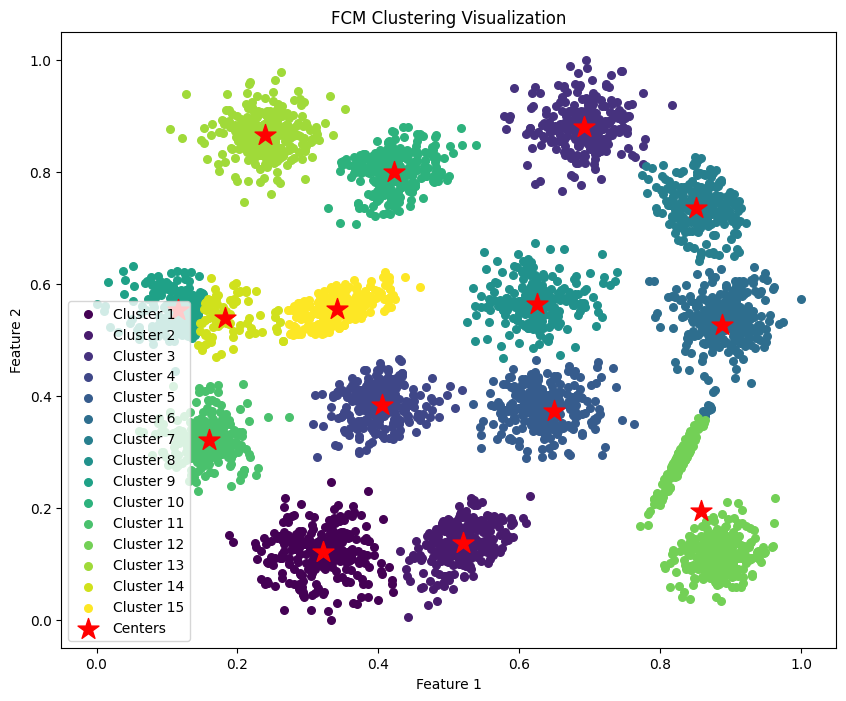

In [148]:
centers = fcm_instance.get_centers()

plot_clusters_fcm(processed_data, labels_pred, centers)

In [149]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


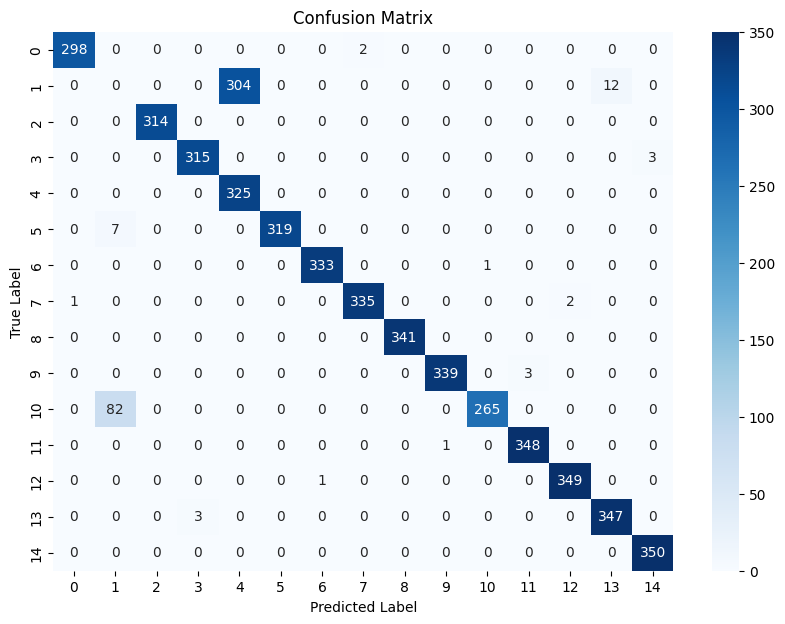


Overall Accuracy: 91.56%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [150]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [151]:
algorithm_params = ""
algorithm_details = str(algorithm_params)

In [152]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 05:51:25.072395
Dataset: s1
Clustering Algorithm: fcm_clustering
Algorithm Details: 
Running Time (seconds): 0.5837361812591553
Accuracy: 0.9156
